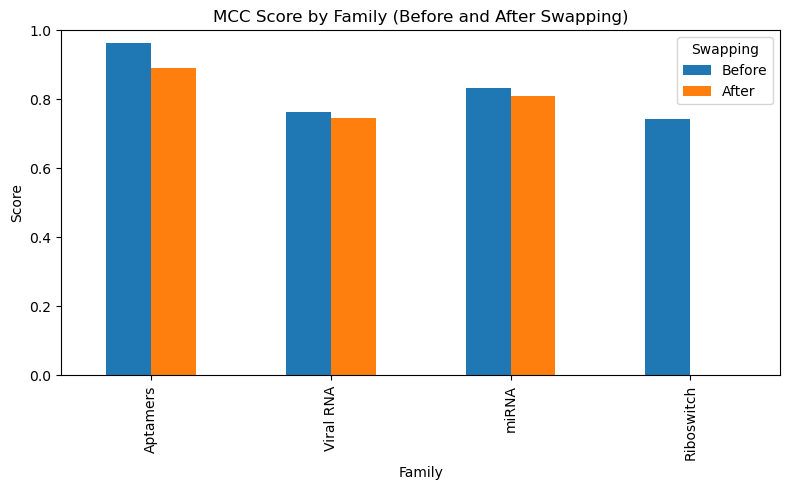

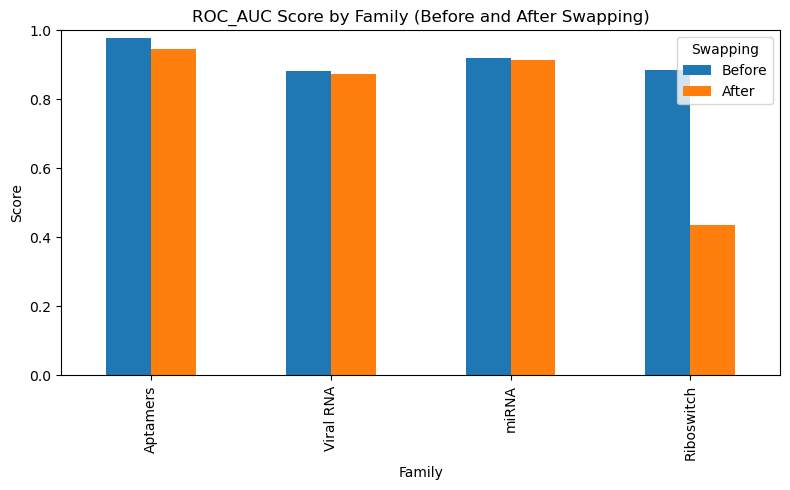

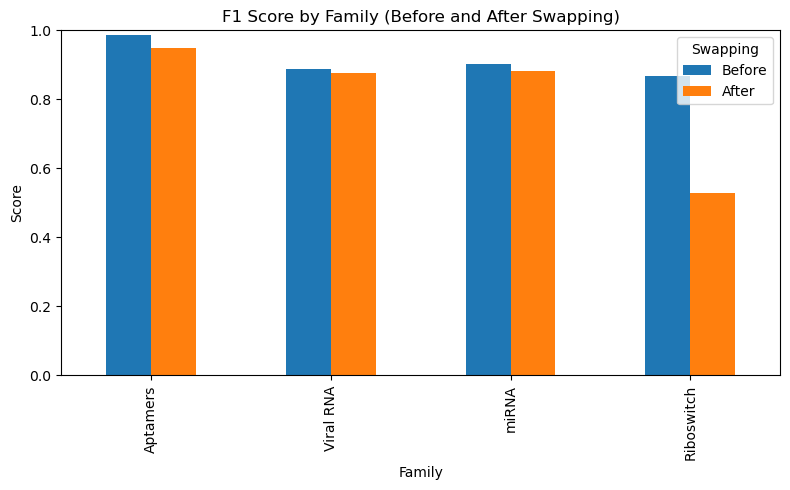

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Family': ['Aptamers', 'Viral RNA', 'miRNA', 'Riboswitch'],
    'MCC_Before': [0.962, 0.764, 0.913, 0.720],
    'MCC_After': [0.892, 0.746 , 0.933, 0.346], 
    'ROC_AUC_Before': [0.979, 0.882, 0.961, 0.856],
    'ROC_AUC_After': [0.946, 0.874, 0.972, 0.667],
    'F1_Before': [0.986, 0.887, 0.945, 0.857],
    'F1_After': [0.949, 0.877, 0.958, 0.689]
}

df = pd.DataFrame(data)
df.set_index('Family', inplace=True)

metrics = ['MCC', 'ROC_AUC', 'F1']
before_cols = [f"{m}_Before" for m in metrics]
after_cols = [f"{m}_After" for m in metrics]

columns = pd.MultiIndex.from_product(
    [metrics, ['Before', 'After']],
    names=['Metric', 'Swapping']
)

plot_df = pd.DataFrame(
    {
        (metric, swap): df[f"{metric}_{swap}"]
        for metric in metrics
        for swap in ['Before', 'After']
    }
)

for metric in metrics:
    ax = plot_df[metric].plot(kind='bar', figsize=(8, 5))
    plt.title(f'{metric} Score by Family (Before and After Swapping)')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(title='Swapping')
    plt.tight_layout()
    plt.show()
